In [ ]:
!python --version

Python 3.7.12


**Julien VALENTIN**, **Mars 2022**

In [ ]:
from matplotlib import pyplot
import numpy

# Un problème de chaleur en 1.D

Soit 
$$
    u : \left\{ \begin{array}{rcl}
        [0,1] \times [-1,1] & \longrightarrow & \mathbb{R} \\
        t,x & \longmapsto & -e^{-t} \sin(\pi x)
        \end{array} \right.
$$

On affirme que cette fonction est l'unique solution analytique du problème de la chaleur


> \begin{align}
\frac{\partial u}{\partial t}(t; x) - \alpha \frac{\partial^2 u}{\partial x^2}(t; x) & = 0 & \forall (t,x) \in (0,1) \times (-1,1) \\
u(t,-1) & = 0 & \forall t \in (0,1) \\
u(t,1) & = 0 & \forall t \in (0,1) \\
u(0,x) & = - \sin(\pi x) & \forall x \in (-1,1)
\end{align}

In [ ]:
# Setup
alpha = 1/numpy.pi**2
u0 = lambda x : - numpy.sin(numpy.pi * x)
u  = lambda t, x : - numpy.exp(-t) * numpy.sin(numpy.pi*x)

# Discrétisation spatiale
xg = -1
xd =  1
dx =  0.025
nx =  int( (xd-xg)/dx ) + 1
Ox = numpy.linspace(xg, xd, nx)

# Discrétisation temporelle
t0 = 0
tf = 1
dt = 0.0025
nt = int( (tf-t0)/dt ) + 1

# schéma Forward Time Central Space

Ce schéma s'obtient par application de la méthode des différences finies à l'équation de la chaleur. On obtient le schéma explicite 

> $$ u^{k+1}_i = u^k_i + \frac{\alpha \Delta t}{\Delta x^2} \left( u^k_{i+1} - 2u^k_i + u^k_{i-1} \right) $$

In [ ]:
beta = alpha*dt / (dx**2)

Uh = numpy.zeros((nt, nx))    # Uh[k,i] = Uh(t_k, x_i)

Uh[0,:] = u0(Ox)    # condition initiale

for k in range(1,nt):    # itération en temps

    for i in range(1,nx-1):    # itération en espace
        
        Uh[k,i] = Uh[k-1,i] + beta * ( Uh[k-1,i+1] - 2*Uh[k-1,i] + Uh[k-1, i-1] )    # Schéma explicite
    
    Uh[k,0]  = 0    # Dirichlet à gauche
    Uh[k,-1] = 0    # Dirichlet à droite

U = u(1, Ox)    # solution analytique à t = 1.

Voyons le résultat à la date $t=1$.

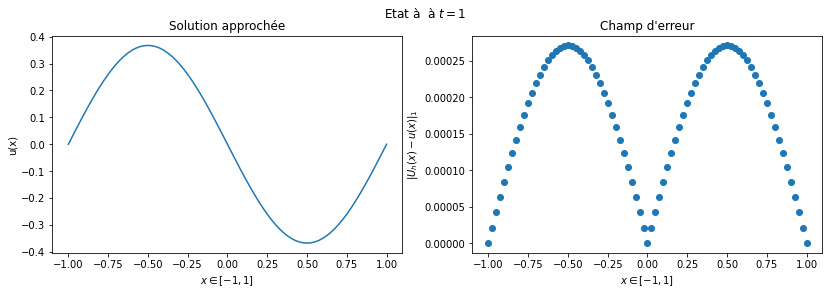

In [ ]:
fig, ax, = pyplot.subplots(1, 2)            # Figure avec 1 ligne et deux colonnes
fig.set_figwidth(2.3*fig.get_figwidth())    # longueur de la figure doublée
fig.suptitle("Etat à  à $t=1$")             # titre de la figure

ax[0].plot(Ox, Uh[-1,:])                 # graphe sur le premier emplacement
ax[0].set_title("Solution approchée")    # titre du premier graphe
ax[0].set_xlabel("$x \in [-1,1]$")       # titre de l'axe des absisses
ax[0].set_ylabel("u(x)")                 # titre de l'axe des ordonnées

ax[1].scatter(Ox, numpy.abs(U-Uh[-1,:]))       # graphe sur le second emplacement
ax[1].set_title("Champ d'erreur")              # titre du second graphe
ax[1].set_xlabel("$x \in [-1,1]$")             # titre de l'axe des absisses
ax[1].set_ylabel("$\| U_h(x) - u(x) \|_1$")    # titre de l'axe des ordonnées 

pyplot.show()    # Affichage

# schéma de Runge-Kutta 3

La discrétisation spatiale se fait toujours par différence finies avec le schéma centré d'ordre 2 pour le laplacien. En revanche, la discrétisation temporelle se fait à l'aide d'une méthode de Runge-Kutta 3.

Le passage de la date $k$ à $k+1$ se fait en trois étapes.

\begin{align}
    u^1_i & = u^k_i + \frac{\alpha \Delta t}{\Delta x^2} \left( u^k_{i+1} - 2 u^k_i + u^k_{i-1} \right) \\
    u^2_i & = \frac{3}{4} u^k_i + \frac{1}{4} u^1_i + \frac{\alpha \Delta t}{4 \Delta x^2} \left( u^k_{i+1} - 2 u^k_i + u^k_{i-1} \right) \\
    u^{k+1}_i & = \frac{1}{3} u^k_i + \frac{2}{3} u^2_i + \frac{2 \alpha \Delta t}{3 \Delta x^2} \left( u^k_{i+1} - 2 u^k_i + u^k_{i-1} \right)
\end{align}

In [ ]:
Uh = numpy.zeros((nt, nx))    # Uh[k,i] = Uh(t_k, x_i)

Uh[0,:] = u0(Ox)    # condition initiale

for k in range(1, nt):    # itération temporelle

    for i in range(1,nx-1):    # itération spatiale

        u1 = Uh[k-1,i] + alpha*dt/dx**2 * ( Uh[k-1,i+1] - 2*Uh[k-1,i] + Uh[k-1,i-1] )
        u2 = 3/4.*Uh[k-1,i] + 1/4.*u1 + alpha*dt/(4*dx**2) * ( Uh[k-1,i+1] - 2*Uh[k-1,i] + Uh[k-1,i-1] )
        Uh[k,i] = 1/3.*Uh[k-1,i] + 2/3.*u2 + 2*alpha*dt/(3*dx**2) * ( Uh[k-1,i+1] - 2*Uh[k-1,i] + Uh[k-1,i-1] )

    Uh[k,0]  = 0    # Dirichlet à gauche
    Uh[k,-1] = 0    # Dirichlet à droite

U = u(1, Ox)    # solution analytique à t = 1

Regardons à $t = 1$.

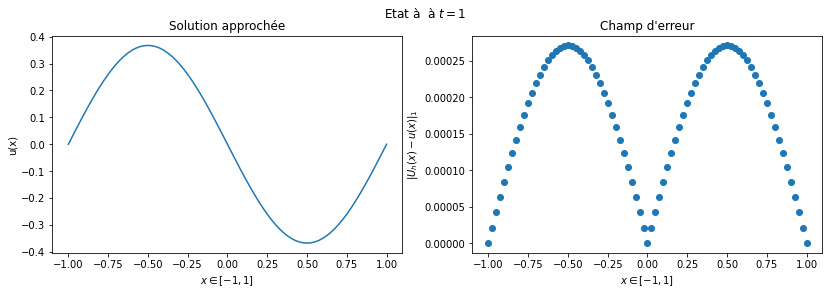

In [ ]:
fig, ax, = pyplot.subplots(1, 2)            # Figure avec 1 ligne et deux colonnes
fig.set_figwidth(2.3*fig.get_figwidth())    # longueur de la figure doublée
fig.suptitle("Etat à  à $t=1$")             # titre de la figure

ax[0].plot(Ox, Uh[-1,:])                 # graphe sur le premier emplacement
ax[0].set_title("Solution approchée")    # titre du premier graphe
ax[0].set_xlabel("$x \in [-1,1]$")       # titre de l'axe des absisses
ax[0].set_ylabel("u(x)")                 # titre de l'axe des ordonnées

ax[1].scatter(Ox, numpy.abs(U-Uh[-1,:]))       # graphe sur le second emplacement
ax[1].set_title("Champ d'erreur")              # titre du second graphe
ax[1].set_xlabel("$x \in [-1,1]$")             # titre de l'axe des absisses
ax[1].set_ylabel("$\| U_h(x) - u(x) \|_1$")    # titre de l'axe des ordonnées 

pyplot.show()    # Affichage

# schéma de Crank-Nicolson

Il s'obtient encore par une méthode de différences finies. La discrétisation spatiale fait toujours appel au stencil à trois points pour le laplacien. La discrétisation temporelle s'obtient en combinant le schéma d'ordre 1 avançant à la date $k$ et le schéma rétrograde d'ordre $1$ à la date $k+1$.